In [534]:
# Importamos las librerias que vamos as utilizar

import os
import requests
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from dotenv import load_dotenv



In [535]:
load_dotenv(dotenv_path=".env")

api_key = os.environ.get("api_key")

In [536]:
# Establecemos las rutas de los directorios con los que vamos a trabajar

cwd = os.getcwd() #
BASE_DIR = os.path.dirname(cwd) 
DATA_DIR = os.path.join(BASE_DIR, "data") 
CACHE_DIR = os.path.join(BASE_DIR, "cache") 
os.makedirs(CACHE_DIR, exist_ok=True) 

In [537]:
url_nolose = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-POR/data.ajson/?auth_key={api_key}"
url_nolose2 = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-23248/data.ajson/?auth_key={api_key}"
url_nolose3= f"http://api.datosabiertos.enacom.gob.ar/api/v2/visualizations/PENET-DE-INTER-FIJO-57760/?auth_key={api_key}&output=ajson"

nolose = requests.get(url_nolose)
nolose2 = requests.get(url_nolose2)
nolose3 = requests.get(url_nolose3)

my_dataframes = []
for respone in [nolose, nolose2, nolose3]:
    my_dataframes.append(respone.json())

In [538]:
display(my_dataframes[0])

{'result': [['Año',
   'Trimestre',
   'Provincia',
   'ADSL',
   'Cablemodem',
   'Fibra óptica',
   'Wireless',
   'Otros',
   'Total'],
  ['2022',
   '3',
   'Buenos Aires',
   '339,648',
   '2,748,325',
   '1,436,433',
   '126,846',
   '70,416',
   '4,721,668'],
  ['2022',
   '3',
   'Capital Federal',
   '140,791',
   '1,240,125',
   '129,218',
   '5,758',
   '31,787',
   '1,547,679'],
  ['2022',
   '3',
   'Catamarca',
   '10,010',
   '10,495',
   '46,224',
   '1,329',
   '2,235',
   '70,293'],
  ['2022',
   '3',
   'Chaco',
   '27,164',
   '61,800',
   '44,645',
   '8,178',
   '2,359',
   '144,146'],
  ['2022',
   '3',
   'Chubut',
   '45,377',
   '72,212',
   '9,574',
   '29,784',
   '8,831',
   '165,778'],
  ['2022',
   '3',
   'Córdoba',
   '163,770',
   '465,461',
   '338,570',
   '61,070',
   '9,797',
   '1,038,668'],
  ['2022',
   '3',
   'Corrientes',
   '36,508',
   '77,140',
   '18,619',
   '7,256',
   '5,323',
   '144,846'],
  ['2022',
   '3',
   'Entre Ríos',
   '60,3

In [539]:
display(my_dataframes[1])

{'result': [['Año',
   'Trimestre',
   'Provincia',
   'HASTA 512 kbps',
   '+ 512 Kbps - 1 Mbps',
   '+ 1 Mbps - 6 Mbps',
   '+ 6 Mbps - 10 Mbps',
   '+ 10 Mbps - 20 Mbps',
   '+ 20 Mbps - 30 Mbps',
   '+ 30 Mbps',
   'OTROS',
   'Total'],
  ['2022',
   '3',
   'Buenos Aires',
   '29,985',
   '27,709',
   '290,315',
   '297,915',
   '267,044',
   '124,190',
   '3,618,689',
   '65,821',
   '4,721,668'],
  ['2022',
   '3',
   'Capital Federal',
   '517',
   '5,742',
   '34,371',
   '67,829',
   '51,946',
   '28,692',
   '1,253,105',
   '105,477',
   '1,547,679'],
  ['2022',
   '3',
   'Catamarca',
   '71',
   '384',
   '3,107',
   '5,389',
   '5,099',
   '3,737',
   '50,298',
   '2,208',
   '70,293'],
  ['2022',
   '3',
   'Chaco',
   '461',
   '987',
   '16,782',
   '18,938',
   '8,049',
   '15,828',
   '79,390',
   '3,711',
   '144,146'],
  ['2022',
   '3',
   'Chubut',
   '109',
   '1,444',
   '45,707',
   '30,940',
   '34,682',
   '15,309',
   '17,563',
   '20,024',
   '165,778'],
 

In [540]:
display(my_dataframes[2])

{'result': None,
 'status': 3,
 'endpoint': None,
 'description': 'Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia',
 'parameters': [],
 'tags': ['internet', 'banda ancha', 'penetración'],
 'last_revision_id': 50976,
 'timestamp': None,
 'created_at': '2020-12-22T19:34:37Z',
 'title': 'Penetración de Internet fijo (accesos por cada 100 hogares)',
 'modified_at': '2023-03-21T17:15:43Z',
 'category_id': 79257,
 'methods': None,
 'sources': [],
 'total_revisions': 5,
 'frequency': None,
 'link': None,
 'user': 'nlastra',
 'status_str': None,
 'guid': 'PENET-DE-INTER-FIJO-57760',
 'category_name': 'Acceso a Internet'}

Nos arroja un diccionario, vemos que tiene distintas keys, la key 'result' tiene los datos que queremos del dataframe

In [541]:
df_internet = pd.DataFrame(my_dataframes[0]['result'])
df_velocidad = pd.DataFrame(my_dataframes[1]['result'])
df_penetracion = pd.read_csv('./Internet_Penetracion.csv')

No queremos que nos tome los headers como una fila, adicional a eso vamos a utilizar el valor para establecer el nombre de la columnas

In [542]:
df_internet = pd.DataFrame(my_dataframes[0]['result'][1:], columns=my_dataframes[0]['result'][0])
df_velocidad = pd.DataFrame(my_dataframes[1]['result'][1:], columns=my_dataframes[1]['result'][0])

Vamos a remover los separadores de unidades

In [543]:
df_internet = df_internet.apply(lambda x: x.str.replace(',', ''))
df_velocidad = df_velocidad.apply(lambda x: x.str.replace(',', ''))

In [544]:
display(df_internet['Año'].unique())
display(df_velocidad['Año'].unique())

display(df_internet['Trimestre'].unique())
display(df_velocidad['Trimestre'].unique())

array(['2022', '2021', '2020', '2019', '2019 *', '2018', '2017', '2016',
       '2015', '2014', '*'], dtype=object)

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014'], dtype=object)

array(['3', '2', '1', '4', '3 *', '2 *', '1 *',
       'Los datos provinciales no coinciden a nivel nacional ya que se rincorporó información que no contien apertuta a nivel geográfico.'],
      dtype=object)

array(['3', '2', '1', '4'], dtype=object)

Observamos que hay datos que contienen '*' dentro de sus valores, los vamos a remover, junto con la fila 840

In [545]:
display(df_internet)
display(df_velocidad)

Año                                          Trimestre  \
0    2022                                                  3   
1    2022                                                  3   
2    2022                                                  3   
3    2022                                                  3   
4    2022                                                  3   
..    ...                                                ...   
836  2014                                                  1   
837  2014                                                  1   
838  2014                                                  1   
839  2014                                                  1   
840     *  Los datos provinciales no coinciden a nivel na...   

               Provincia    ADSL Cablemodem Fibra óptica Wireless  Otros  \
0           Buenos Aires  339648    2748325      1436433   126846  70416   
1        Capital Federal  140791    1240125       129218     5758  31787   
2              Catamarca   10010      10495        46224     1329   2235   
3                  Chaco   27164      61800        44645     8178   2359   
4                 Chubut   45377      72212         9574    29784   8831   
..                   ...     ...        ...          ...      ...    ...   
836             Santa Fe  322662     174296         3059     5951    644   
837  Santiago Del Estero   32567       3598           19      915     34   
838     Tierra Del Fuego   21618       2837          648        1   2934   
839              Tucumán  129717         83          121       13     98   
840                                                                        

       Total  
0    4721668  
1    1547679  
2      70293  
3     144146  
4     165778  
..       ...  
836   506612  
837    37133  
838    28038  
839   130032  
840           

[841 rows x 9 columns]

Año Trimestre            Provincia HASTA 512 kbps + 512 Kbps - 1 Mbps  \
0    2022         3         Buenos Aires          29985               27709   
1    2022         3      Capital Federal            517                5742   
2    2022         3            Catamarca             71                 384   
3    2022         3                Chaco            461                 987   
4    2022         3               Chubut            109                1444   
..    ...       ...                  ...            ...                 ...   
835  2014         1           Santa Cruz            161                1625   
836  2014         1             Santa Fe           8456              124468   
837  2014         1  Santiago Del Estero           1234               10531   
838  2014         1     Tierra Del Fuego             12                 607   
839  2014         1              Tucumán              6               34672   

    + 1 Mbps - 6 Mbps + 6 Mbps - 10 Mbps + 10 Mbps - 20 Mbps  \
0              290315             297915              267044   
1               34371              67829               51946   
2                3107               5389                5099   
3               16782              18938                8049   
4               45707              30940               34682   
..                ...                ...                 ...   
835             24972                  1                   1   
836            345225              20328                6845   
837             22817               2422                 109   
838             30902                  6                   0   
839             83210              11779                 362   

    + 20 Mbps - 30 Mbps + 30 Mbps   OTROS    Total  
0                124190   3618689   65821  4721668  
1                 28692   1253105  105477  1547679  
2                  3737     50298    2208    70293  
3                 15828     79390    3711   144146  
4                 15309     17563   20024   165778  
..                  ...       ...     ...      ...  
835                   0         0       0    26760  
836                  23       668       0   506013  
837                   0         0       0    37113  
838                   0         0       0    31527  
839                   3         0       0   130032  

[840 rows x 12 columns]

In [546]:
df_internet['Año'] = df_internet['Año'].str.replace('*', '')
df_internet['Año'] = df_internet['Año'].str.replace(' ', '')
df_internet['Trimestre'] = df_internet['Trimestre'].str.replace('*', '')
df_internet['Trimestre'] = df_internet['Trimestre'].str.replace(' ', '')
df_internet = df_internet.drop(840)

df_velocidad['Año'] = df_velocidad['Año'].str.replace('*', '')
df_velocidad['Año'] = df_velocidad['Año'].str.replace(' ', '')
df_velocidad['Trimestre'] = df_velocidad['Trimestre'].str.replace('*', '')
df_velocidad['Trimestre'] = df_velocidad['Trimestre'].str.replace(' ', '')

display(df_internet['Año'].unique())
display(df_velocidad['Año'].unique())

display(df_internet['Trimestre'].unique())
display(df_velocidad['Trimestre'].unique())

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10372\3894764269.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_internet['Año'] = df_internet['Año'].str.replace('*', '')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10372\3894764269.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_internet['Trimestre'] = df_internet['Trimestre'].str.replace('*', '')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10372\3894764269.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_velocidad['Año'] = df_velocidad['Año'].str.r

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014'], dtype=object)

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014'], dtype=object)

array(['3', '2', '1', '4'], dtype=object)

array(['3', '2', '1', '4'], dtype=object)

In [547]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           840 non-null    object
 1   Trimestre     840 non-null    object
 2   Provincia     840 non-null    object
 3   ADSL          840 non-null    object
 4   Cablemodem    840 non-null    object
 5   Fibra óptica  840 non-null    object
 6   Wireless      840 non-null    object
 7   Otros         840 non-null    object
 8   Total         840 non-null    object
dtypes: object(9)
memory usage: 59.2+ KB


In [548]:
display(df_internet)
display(df_velocidad)

Año Trimestre            Provincia    ADSL Cablemodem Fibra óptica  \
0    2022         3         Buenos Aires  339648    2748325      1436433   
1    2022         3      Capital Federal  140791    1240125       129218   
2    2022         3            Catamarca   10010      10495        46224   
3    2022         3                Chaco   27164      61800        44645   
4    2022         3               Chubut   45377      72212         9574   
..    ...       ...                  ...     ...        ...          ...   
835  2014         1           Santa Cruz   18927        100          381   
836  2014         1             Santa Fe  322662     174296         3059   
837  2014         1  Santiago Del Estero   32567       3598           19   
838  2014         1     Tierra Del Fuego   21618       2837          648   
839  2014         1              Tucumán  129717         83          121   

    Wireless  Otros    Total  
0     126846  70416  4721668  
1       5758  31787  1547679  
2       1329   2235    70293  
3       8178   2359   144146  
4      29784   8831   165778  
..       ...    ...      ...  
835     4092   3264    26764  
836     5951    644   506612  
837      915     34    37133  
838        1   2934    28038  
839       13     98   130032  

[840 rows x 9 columns]

Año Trimestre            Provincia HASTA 512 kbps + 512 Kbps - 1 Mbps  \
0    2022         3         Buenos Aires          29985               27709   
1    2022         3      Capital Federal            517                5742   
2    2022         3            Catamarca             71                 384   
3    2022         3                Chaco            461                 987   
4    2022         3               Chubut            109                1444   
..    ...       ...                  ...            ...                 ...   
835  2014         1           Santa Cruz            161                1625   
836  2014         1             Santa Fe           8456              124468   
837  2014         1  Santiago Del Estero           1234               10531   
838  2014         1     Tierra Del Fuego             12                 607   
839  2014         1              Tucumán              6               34672   

    + 1 Mbps - 6 Mbps + 6 Mbps - 10 Mbps + 10 Mbps - 20 Mbps  \
0              290315             297915              267044   
1               34371              67829               51946   
2                3107               5389                5099   
3               16782              18938                8049   
4               45707              30940               34682   
..                ...                ...                 ...   
835             24972                  1                   1   
836            345225              20328                6845   
837             22817               2422                 109   
838             30902                  6                   0   
839             83210              11779                 362   

    + 20 Mbps - 30 Mbps + 30 Mbps   OTROS    Total  
0                124190   3618689   65821  4721668  
1                 28692   1253105  105477  1547679  
2                  3737     50298    2208    70293  
3                 15828     79390    3711   144146  
4                 15309     17563   20024   165778  
..                  ...       ...     ...      ...  
835                   0         0       0    26760  
836                  23       668       0   506013  
837                   0         0       0    37113  
838                   0         0       0    31527  
839                   3         0       0   130032  

[840 rows x 12 columns]

In [549]:
df_penetracion['Accesos por cada 100 hogares'] = df_penetracion['Accesos por cada 100 hogares'].str.replace(',', '.')
display(df_penetracion)

Año  Trimestre            Provincia Accesos por cada 100 hogares
0    2022          3         Buenos Aires                        78.11
1    2022          3      Capital Federal                       122.28
2    2022          3            Catamarca                        65.33
3    2022          3                Chaco                        43.86
4    2022          3               Chubut                        84.38
..    ...        ...                  ...                          ...
835  2014          1           Santa Cruz                        28.94
836  2014          1             Santa Fe                        47.85
837  2014          1  Santiago Del Estero                        16.31
838  2014          1     Tierra Del Fuego                        63.97
839  2014          1              Tucumán                        33.42

[840 rows x 4 columns]

Cambiaremos el nombre de las columnas otros para distinguir los dataframes de uno con el otro

In [550]:
df_internet = df_internet.rename(columns={'Otros': 'Otros_Internet'})
df_internet.head()

Año Trimestre        Provincia    ADSL Cablemodem Fibra óptica Wireless  \
0  2022         3     Buenos Aires  339648    2748325      1436433   126846   
1  2022         3  Capital Federal  140791    1240125       129218     5758   
2  2022         3        Catamarca   10010      10495        46224     1329   
3  2022         3            Chaco   27164      61800        44645     8178   
4  2022         3           Chubut   45377      72212         9574    29784   

  Otros_Internet    Total  
0          70416  4721668  
1          31787  1547679  
2           2235    70293  
3           2359   144146  
4           8831   165778

In [551]:
df_velocidad = df_velocidad.rename(columns={'OTROS': 'Otros_Velocidad'})
df_velocidad.loc[df_velocidad['Otros_Velocidad'] == '', 'Otros_Velocidad'] = 0
df_velocidad.head()

Año Trimestre        Provincia HASTA 512 kbps + 512 Kbps - 1 Mbps  \
0  2022         3     Buenos Aires          29985               27709   
1  2022         3  Capital Federal            517                5742   
2  2022         3        Catamarca             71                 384   
3  2022         3            Chaco            461                 987   
4  2022         3           Chubut            109                1444   

  + 1 Mbps - 6 Mbps + 6 Mbps - 10 Mbps + 10 Mbps - 20 Mbps  \
0            290315             297915              267044   
1             34371              67829               51946   
2              3107               5389                5099   
3             16782              18938                8049   
4             45707              30940               34682   

  + 20 Mbps - 30 Mbps + 30 Mbps Otros_Velocidad    Total  
0              124190   3618689           65821  4721668  
1               28692   1253105          105477  1547679  
2                3737     50298            2208    70293  
3               15828     79390            3711   144146  
4               15309     17563           20024   165778

In [552]:
display(df_internet.info())
display(df_velocidad.info())
display(df_penetracion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Año             840 non-null    object
 1   Trimestre       840 non-null    object
 2   Provincia       840 non-null    object
 3   ADSL            840 non-null    object
 4   Cablemodem      840 non-null    object
 5   Fibra óptica    840 non-null    object
 6   Wireless        840 non-null    object
 7   Otros_Internet  840 non-null    object
 8   Total           840 non-null    object
dtypes: object(9)
memory usage: 59.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  840 non-null    object
 1   Trimestre            840 non-null    object
 2   Provincia            840 non-null    object
 3   HASTA 512 kbps       840 non-null    object
 4   + 512 Kbps - 1 Mbps  840 non-null    object
 5   + 1 Mbps - 6 Mbps    840 non-null    object
 6   + 6 Mbps - 10 Mbps   840 non-null    object
 7   + 10 Mbps - 20 Mbps  840 non-null    object
 8   + 20 Mbps - 30 Mbps  840 non-null    object
 9   + 30 Mbps            840 non-null    object
 10  Otros_Velocidad      840 non-null    object
 11  Total                840 non-null    object
dtypes: object(12)
memory usage: 78.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


None

Tenemos que convertir las columnasen tipo int64 para poder hacer el merge y en un futuro las graficas

In [572]:
columnas_internet = ['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros_Internet', 'Total']

columnas_velocidad = ['Año', 'Trimestre', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otros_Velocidad', 'Total']

df_internet[columnas_internet] = df_internet[columnas_internet].astype(np.int64)
df_velocidad[columnas_velocidad] = df_velocidad[columnas_velocidad].astype(np.int64)
df_penetracion['Accesos por cada 100 hogares'] = df_penetracion['Accesos por cada 100 hogares'].astype(np.float64)

Ahora si hacemos el merge


In [573]:
final_df = pd.merge(pd.merge(df_internet, df_velocidad, on=['Año', 'Trimestre', 'Provincia', 'Total']), df_penetracion, on=['Año', 'Trimestre', 'Provincia'])

In [574]:
display(final_df)

Año  Trimestre        Provincia    ADSL  Cablemodem  Fibra óptica  \
0    2022          3     Buenos Aires  339648     2748325       1436433   
1    2022          3  Capital Federal  140791     1240125        129218   
2    2022          3        Catamarca   10010       10495         46224   
3    2022          3            Chaco   27164       61800         44645   
4    2022          3           Chubut   45377       72212          9574   
..    ...        ...              ...     ...         ...           ...   
314  2014          1        Catamarca   24126          46            17   
315  2014          1          Formosa   20774        4548             0   
316  2014          1         La Rioja   15663           0            14   
317  2014          1         San Luis   11306         428           354   
318  2014          1          Tucumán  129717          83           121   

     Wireless  Otros_Internet    Total  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0      126846           70416  4721668           29985                27709   
1        5758           31787  1547679             517                 5742   
2        1329            2235    70293              71                  384   
3        8178            2359   144146             461                  987   
4       29784            8831   165778             109                 1444   
..        ...             ...      ...             ...                  ...   
314         0              43    24232              19                 9147   
315         0             100    25422            2062                 8475   
316         0              34    15711              10                 5111   
317        21             448    12557               7                    3   
318        13              98   130032               6                34672   

     + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0               290315              297915               267044   
1                34371               67829                51946   
2                 3107                5389                 5099   
3                16782               18938                 8049   
4                45707               30940                34682   
..                 ...                 ...                  ...   
314              13330                1672                   64   
315              13685                1133                   67   
316               9390                1165                   35   
317              12544                   0                    1   
318              83210               11779                  362   

     + 20 Mbps - 30 Mbps  + 30 Mbps  Otros_Velocidad  \
0                 124190    3618689            65821   
1                  28692    1253105           105477   
2                   3737      50298             2208   
3                  15828      79390             3711   
4                  15309      17563            20024   
..                   ...        ...              ...   
314                    0          0                0   
315                    0          0                0   
316                    0          0                0   
317                    0          2                0   
318                    3          0                0   

     Accesos por cada 100 hogares  
0                           78.11  
1                          122.28  
2                           65.33  
3                           43.86  
4                           84.38  
..                            ...  
314                         24.25  
315                         17.42  
316                         16.29  
317                          9.35  
318                         33.42  

[319 rows x 18 columns]

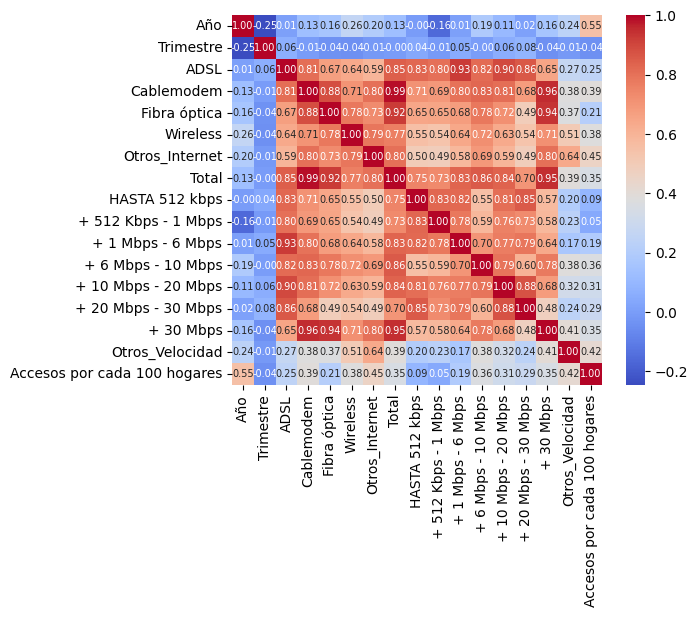

In [575]:
corr = final_df.corr(numeric_only=True)
plt.Figure(figsize=(30,30))
sn.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7},
            cmap='coolwarm')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10372\1036963082.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = final_df.corr()


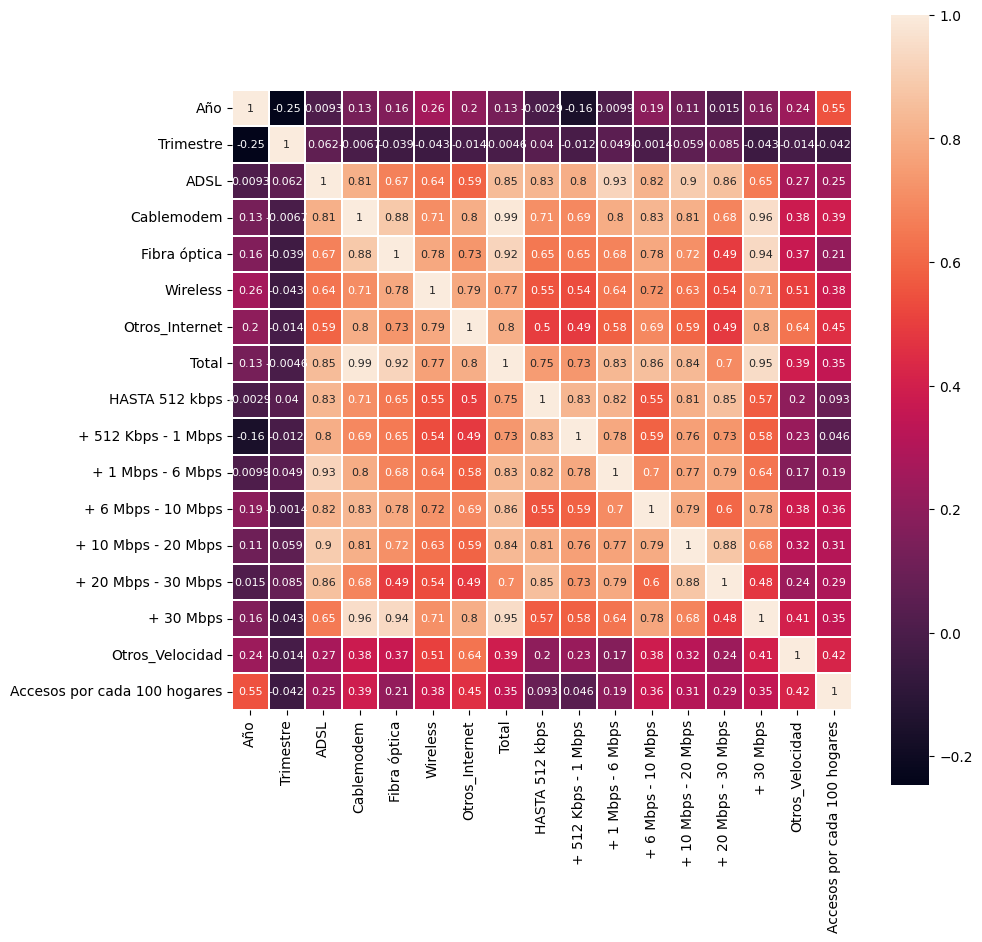

In [576]:
corr_matrix = final_df.corr()
sn.heatmap(corr_matrix, annot=True, square=True, annot_kws={'fontsize': 8}, linewidths=.3)
plt.gcf().set_size_inches(10, 10)
plt.show()

Vemos que el tipo de internet que mas se consume es de cablemodem, seguido de fibra optica. Y la velocidad mas comun es + 30 Mbps 

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10372\547756647.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sn.heatmap(final_df.corr()[['Accesos por cada 100 hogares']].sort_values(by='Accesos por cada 100 hogares', ascending=False), annot=True, cmap='BrBG')


Text(0.5, 1.0, 'Features Correlating with Sales Price')

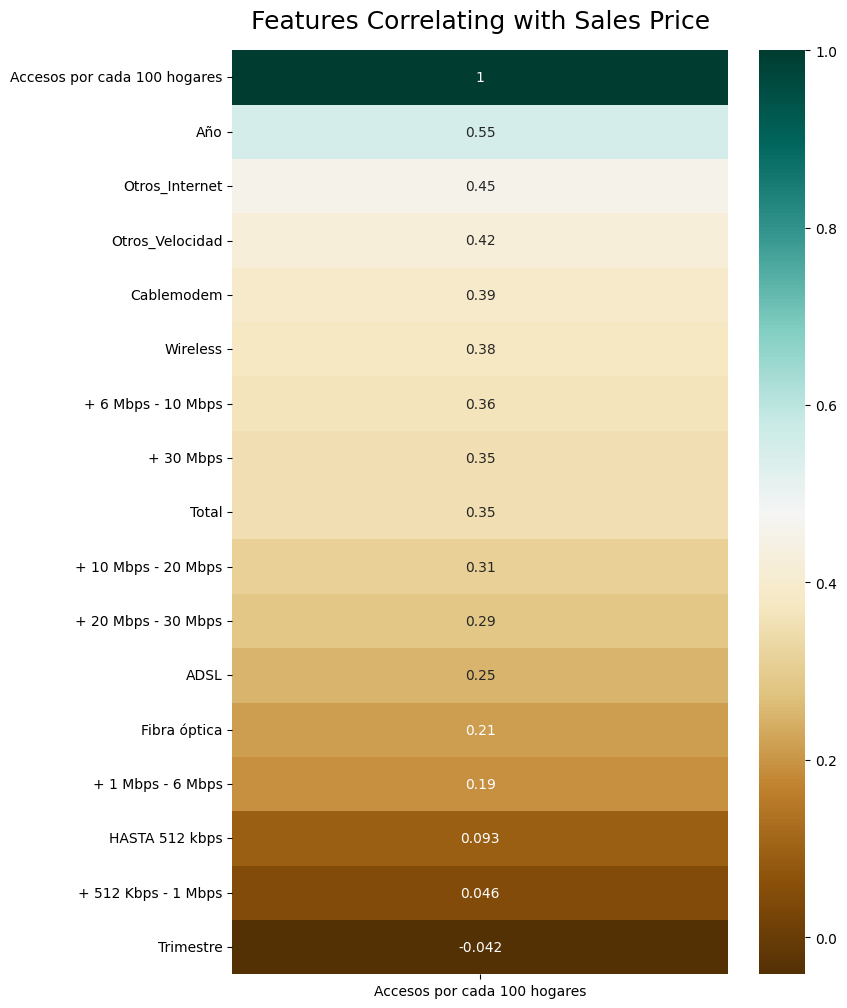

In [580]:
plt.figure(figsize=(8, 12))
heatmap = sn.heatmap(final_df.corr()[['Accesos por cada 100 hogares']].sort_values(by='Accesos por cada 100 hogares', ascending=False), annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16)

In [581]:
final_df.to_csv('./datos.csv')

In [607]:
display(df_internet[df_internet['Provincia']=='Santa Cruz'])

Año  Trimestre   Provincia   ADSL  Cablemodem  Fibra óptica  Wireless  \
19   2022          3  Santa Cruz  10170       24047         10815      3896   
43   2022          2  Santa Cruz  10170       23725         10815      3896   
67   2022          1  Santa Cruz  10537       23420         10766      3974   
91   2021          4  Santa Cruz  10790       22902         10031      4346   
115  2021          3  Santa Cruz  12347       22961          6328      4269   
139  2021          2  Santa Cruz  12347       22967          6328      4269   
163  2021          1  Santa Cruz  12347       23089          5975      4264   
187  2020          4  Santa Cruz  12347       19657          1041      4659   
211  2020          3  Santa Cruz  12845       16098          1027      6938   
235  2020          2  Santa Cruz  12845       16044          1027      6585   
259  2020          1  Santa Cruz  12845       15766          1026      6817   
283  2019          4  Santa Cruz  13264       15899          1036      6800   
307  2019          3  Santa Cruz  10663       17056           969      6544   
331  2019          2  Santa Cruz  10665       10257           379      6514   
355  2019          1  Santa Cruz  10659        4615           382      6514   
379  2018          4  Santa Cruz  10659        4615           382      6378   
403  2018          3  Santa Cruz  18606        4574           585      6238   
427  2018          2  Santa Cruz  18615        4474           585      6734   
451  2018          1  Santa Cruz  18615        4474          1799      6734   
475  2017          4  Santa Cruz  18614        1668           582      4638   
499  2017          3  Santa Cruz  19220        5487          1544      4552   
523  2017          2  Santa Cruz  15311        2722          1365      4735   
547  2017          1  Santa Cruz  15502        2722          1272      4733   
571  2016          4  Santa Cruz  15607        2722          1055      4823   
595  2016          3  Santa Cruz  15570        2722           817      4978   
619  2016          2  Santa Cruz  15453        2722           396      4996   
643  2016          1  Santa Cruz  15654        2723           396      5088   
667  2015          4  Santa Cruz  15614        2723           396      5261   
691  2015          3  Santa Cruz  15540        2718           396      5226   
715  2015          2  Santa Cruz  15343        2707           396      4917   
739  2015          1  Santa Cruz  16215        2700           392      4772   
763  2014          4  Santa Cruz  17553         448           388      4395   
787  2014          3  Santa Cruz  17862         492           385      4273   
811  2014          2  Santa Cruz  18956         448           381      4118   
835  2014          1  Santa Cruz  18927         100           381      4092   

     Otros_Internet  Total  
19              582  49510  
43              579  49185  
67              405  49102  
91              417  48486  
115            3071  48976  
139            3071  48982  
163             390  46065  
187            2970  40674  
211            2373  39281  
235            2368  38869  
259            2368  38822  
283            2371  39370  
307            2738  37970  
331            2735  30550  
355            2735  24905  
379            2734  24768  
403            3996  33999  
427            3997  34405  
451            2783  34405  
475            3950  29452  
499            2887  33690  
523            2255  26388  
547            2257  26486  
571            2257  26464  
595            2170  26257  
619            2586  26153  
643            2426  26287  
667            2409  26403  
691            2391  26271  
715            2400  25763  
739            2562  26641  
763            2929  25713  
787            3098  26110  
811            3266  27169  
835            3264  26764